## Observations and Insights 

In [1]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import pandas as pd
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "02-Homework_05-Matplotlib_Instructions_Pymaceuticals_data_Mouse_metadata (1).csv"
study_results_path = "02-Homework_05-Matplotlib_Instructions_Pymaceuticals_data_Study_results (1).csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
total_mice = mouse_metadata["Mouse ID"].count()
total_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

### need explanation for this formula
duplicate_mice = combined_df.loc[combined_df.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
print(duplicate_mice)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 




In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = combined_df[combined_df['Mouse ID'].isin(duplicate_mice)== False]

print(clean_df)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [6]:
clean_df['Mouse ID'].count()

1880

In [7]:

#Checking the number of mice in the clean DataFrame.
clean_mice = clean_df['Mouse ID'].value_counts()
total_number_mice_clean = len(clean_mice)
(total_number_mice_clean)

#total_number_mice_clean = clean_df['Mouse ID'].count()



248

In [8]:
??pd.Series.value_counts

## Summary Statistics

In [9]:
clean_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [10]:
??pd.Series.agg

In [11]:
#Aggregate Function

summary_table_agg_func = clean_df.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
summary_table_agg_func

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [12]:
### Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen###

# This method is the most straighforward, creating multiple series and putting them all together at the end.
reg_mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
reg_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [13]:
reg_med = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
reg_med

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [14]:
reg_var = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
reg_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [15]:
reg_std =clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
reg_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [16]:
reg_sem =clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
reg_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_stats_table = pd.DataFrame({"Mean": reg_mean, "Median": reg_med, "Variance": reg_var, "Standard Deviation": reg_std, "SEM": reg_sem})

summary_stats_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [18]:
type(clean_df)

pandas.core.frame.DataFrame

In [19]:
mouse_metadata.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')

<IPython.core.display.Javascript object>


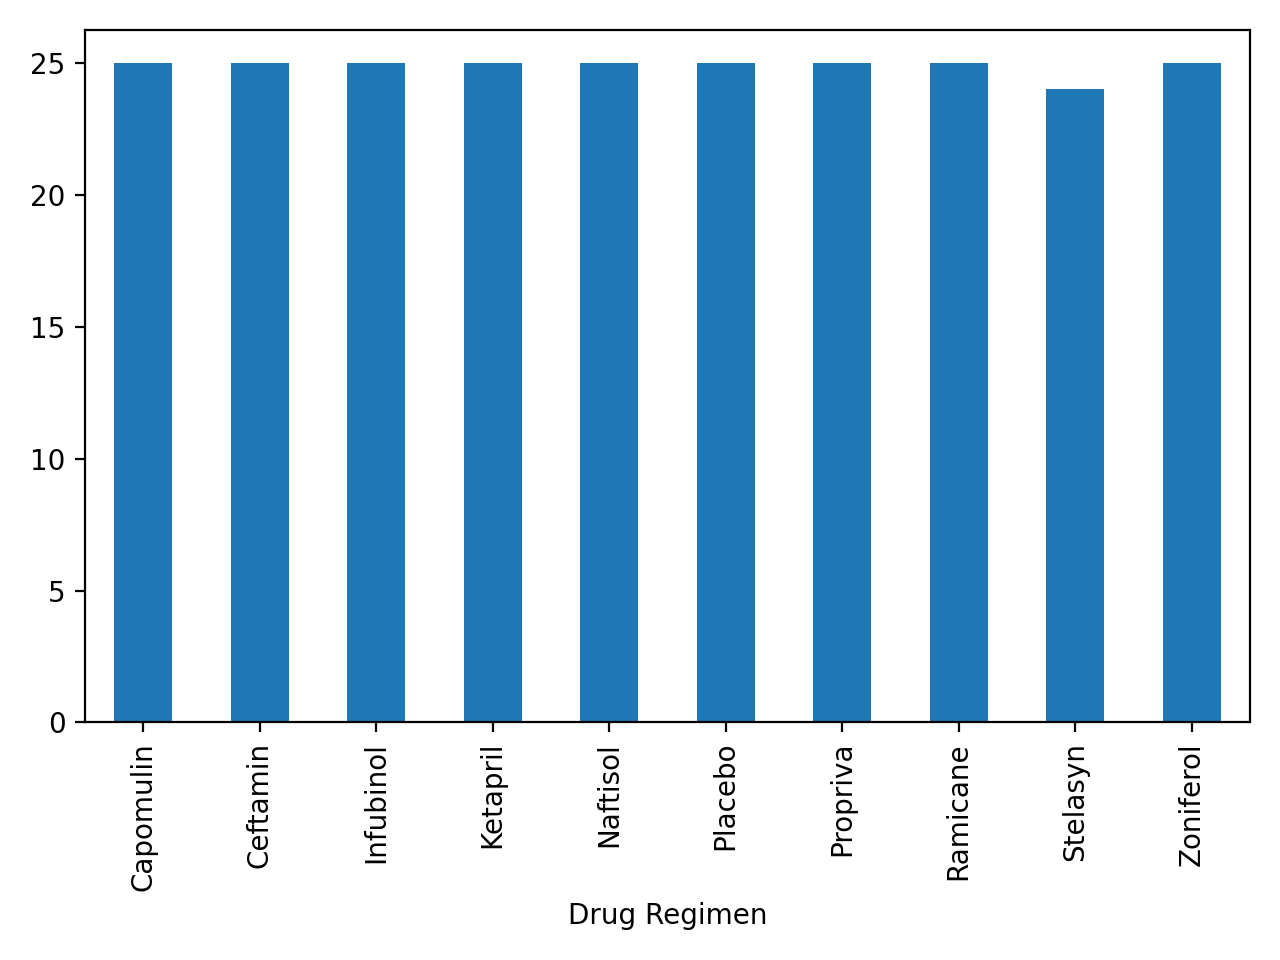

In [20]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
mouse_metadata.groupby('Drug Regimen')['Mouse ID'].count().plot(kind = 'bar')
plt.show
plt.tight_layout()

<IPython.core.display.Javascript object>


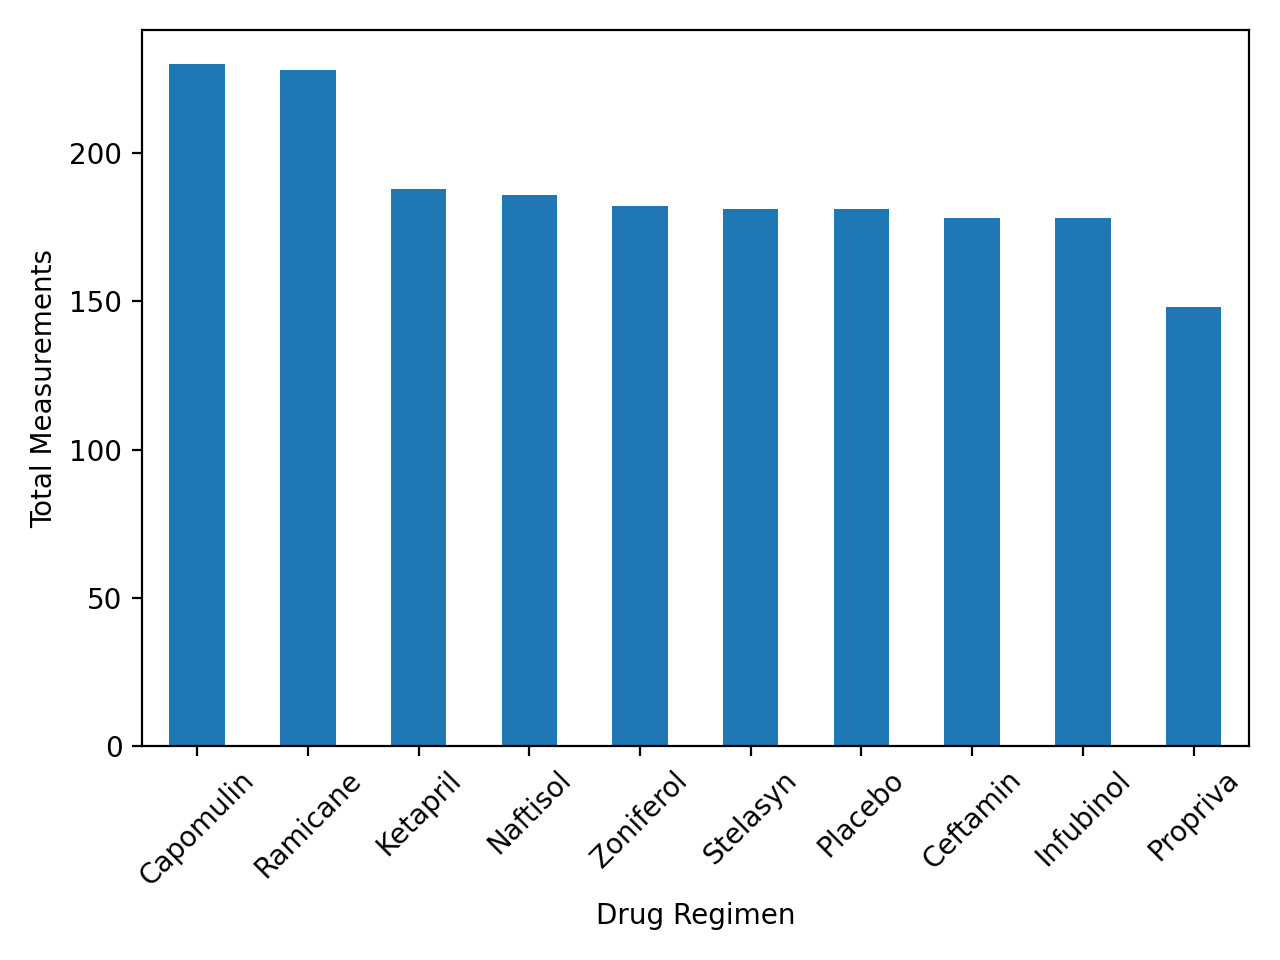

In [21]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
total_drugs = clean_df["Drug Regimen"].value_counts()
total_drugs.plot(kind = 'bar')
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 45)
plt.ylabel("Total Measurements")
plt.show()
plt.tight_layout()


In [ ]:
#Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.


In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
groupby_gender = combined_df.groupby(['Mouse ID', 'Sex'])
groupby_gender
gender_df = pd.DataFrame(groupby_gender.size())
gender_df

mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender



,0
Sex,
Female,124
Male,125


<IPython.core.display.Javascript object>


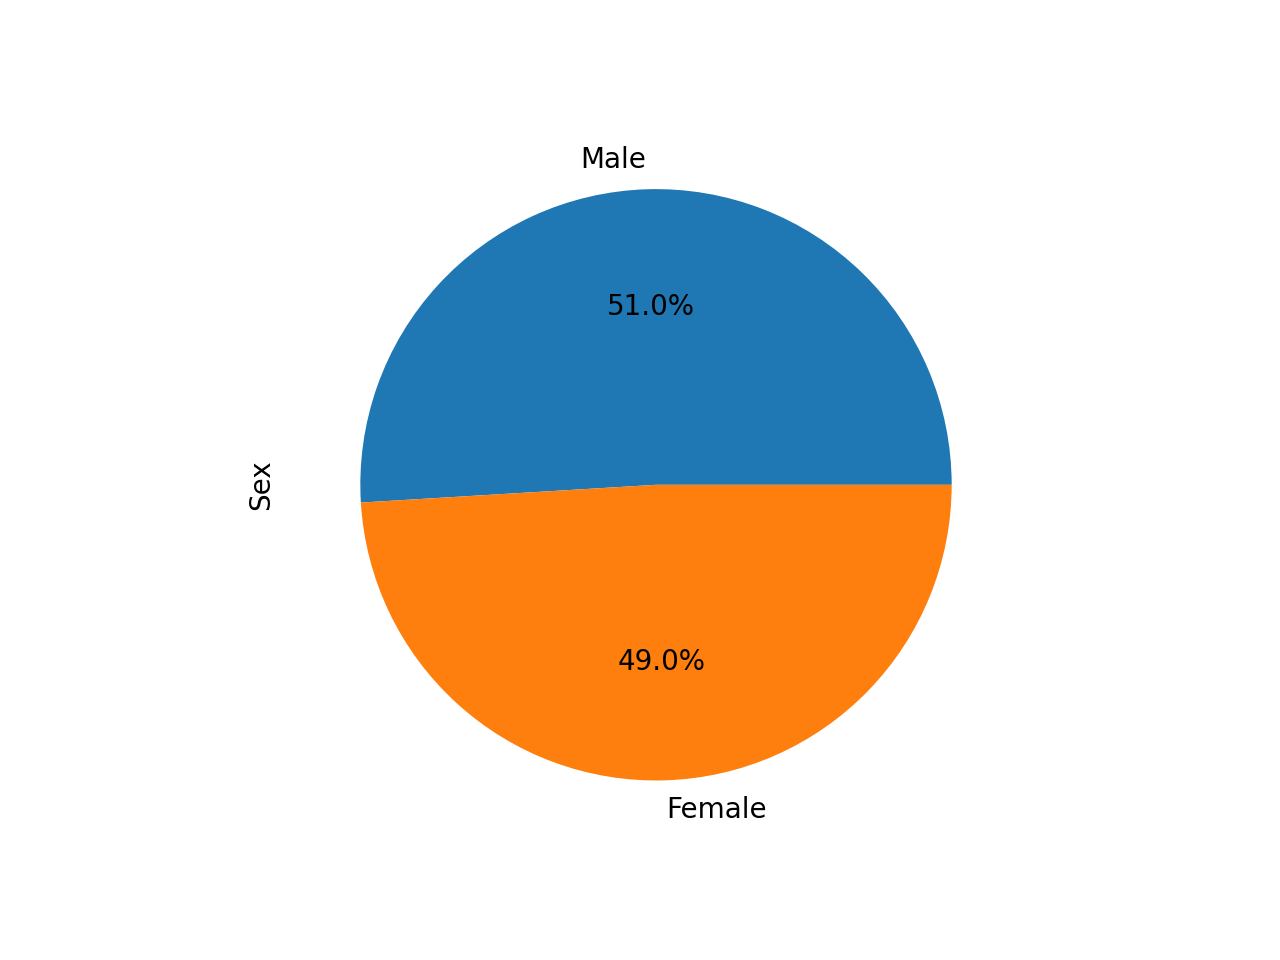

In [23]:
mice_gender_distribution = clean_df['Sex'].value_counts()
mice_gender_distribution.plot(kind = 'pie', autopct = '%1.1f%%')
plt.show()

<IPython.core.display.Javascript object>


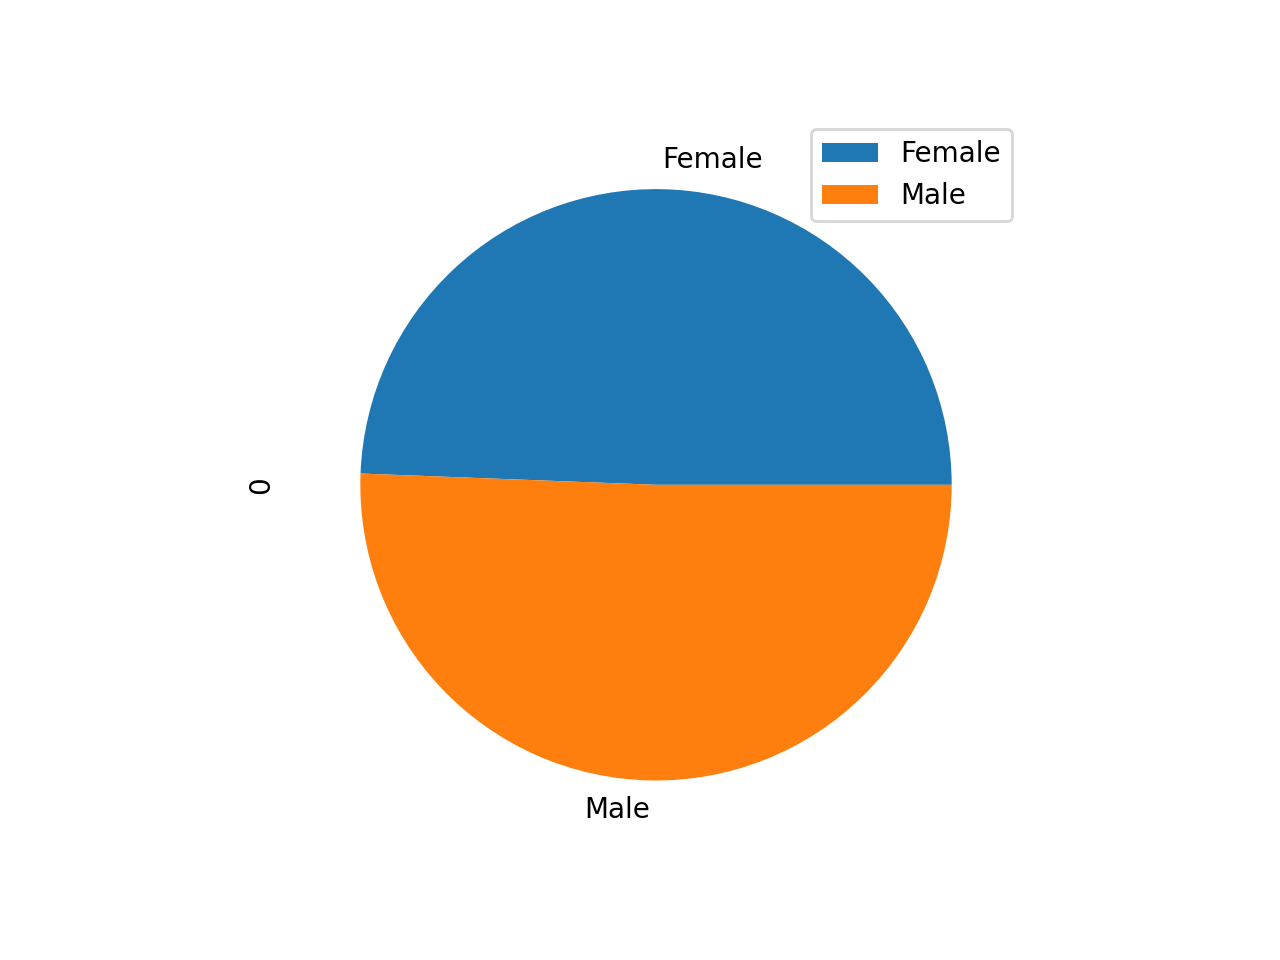

array([<AxesSubplot:ylabel='0'>], dtype=object)

In [24]:
gender_df.groupby(["Sex"]).sum().plot(kind = 'pie', subplots = True)

<IPython.core.display.Javascript object>


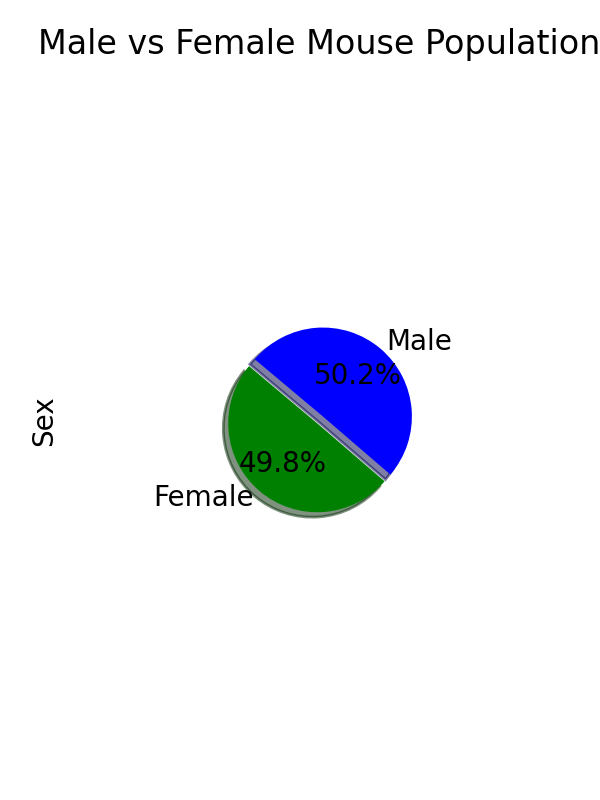

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]

sizes = [124, 125]

colors = ["green", "blue"]

explode = (0.1, 0)

fig1, ax1 = plt.subplots(figsize = (3, 4))
plt.pie(sizes, explode = explode, labels = labels, colors=colors, autopct="%1.1f%%", shadow = True, startangle = 140,)
plt.title("Male vs Female Mouse Population")
plt.ylabel("Sex")
plt.axis('equal')

plt.tight_layout()


## Quartiles, Outliers and Boxplots

In [39]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin",:]

ramicane_df = combined_df.loc[combined_df["Drug Regimen"] == "Ramicane",:]

infubinol_df = combined_df.loc[combined_df["Drug Regimen"] == "Infubinol",:]

ceftamin_df = combined_df.loc[combined_df["Drug Regimen"] == "Ceftamin",:]

# Start by getting the last (greatest) timepoint for each mouse
capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
ramicane_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
infubinol_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']

mouse_last_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max()
mouse_last_timepoint = mouse_last_timepoint.reset_index()

In [40]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = clean_df.merge(mouse_last_timepoint, on = ['Mouse ID', 'Timepoint'], how = 'inner')
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [41]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

#Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# Determine outliers using upper and lower bounds

regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume = []


for regime in regimens:
    final_tumor_volumes = merged_data.loc[merged_data['Drug Regimen'] == regime, 'Tumor Volume (mm3)']
    
    #add subset
    tumor_volume.append(final_tumor_volumes)
    
    #Determine Outliers using upper and lower bounds
    
    quartiles = final_tumor_volumes.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = final_tumor_volumes.loc[(final_tumor_volumes < lower_bound) | (final_tumor_volumes > upper_bound)]

    print(f"{regime}'s potential outliers is {outliers}")
    

Capomulin's potential outliers is Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers is Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers is 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers is Series([], Name: Tumor Volume (mm3), dtype: float64)


<IPython.core.display.Javascript object>


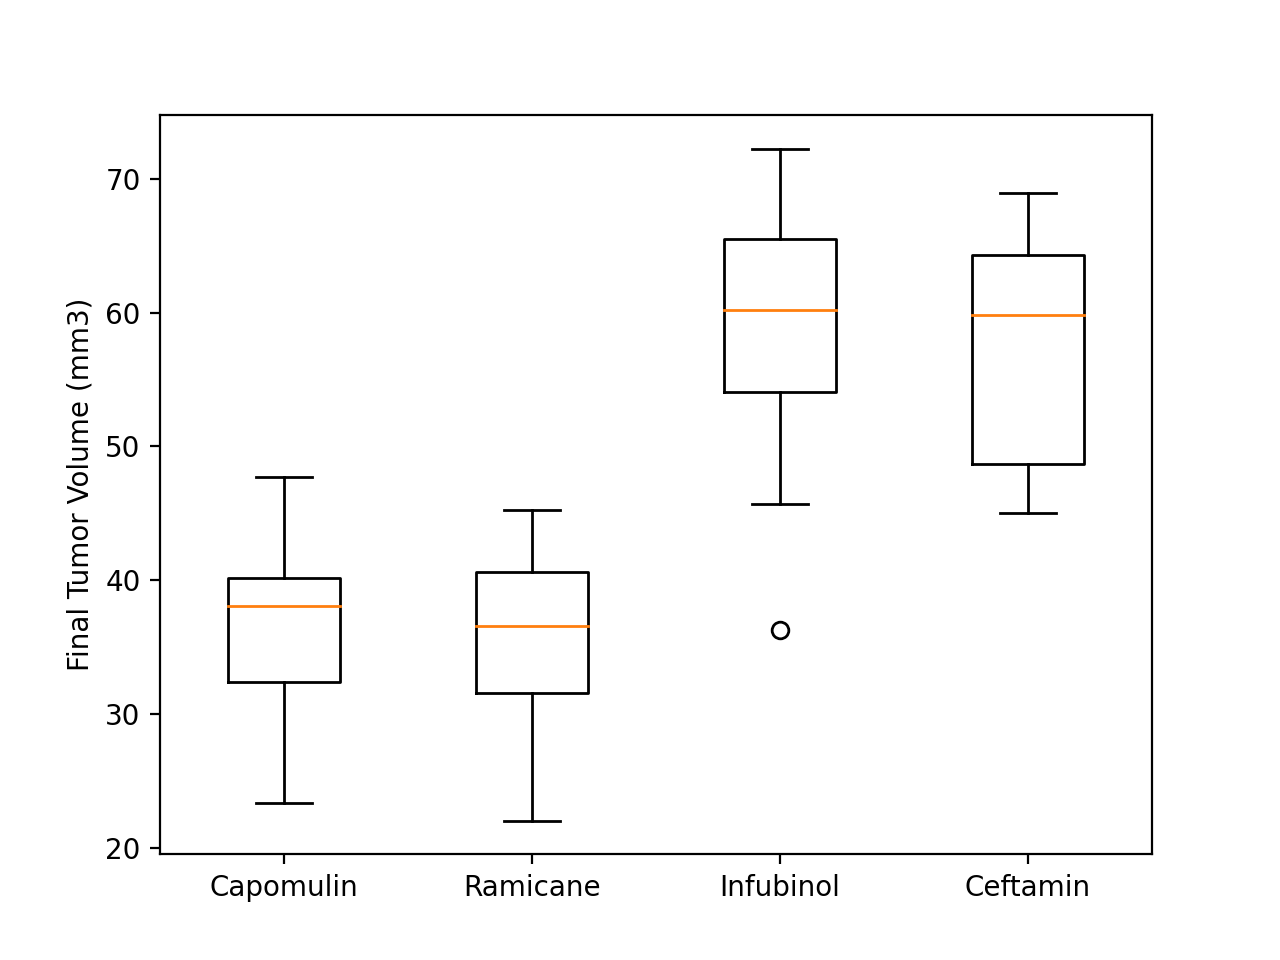

In [42]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volume, labels = regimens)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

In [43]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = clean_df.loc[combined_df["Drug Regimen"] == "Capomulin"]

In [44]:
capomulin_df['Mouse ID'].value_counts().head()

i738    10
v923    10
l509    10
t565    10
b742    10
Name: Mouse ID, dtype: int64

<IPython.core.display.Javascript object>


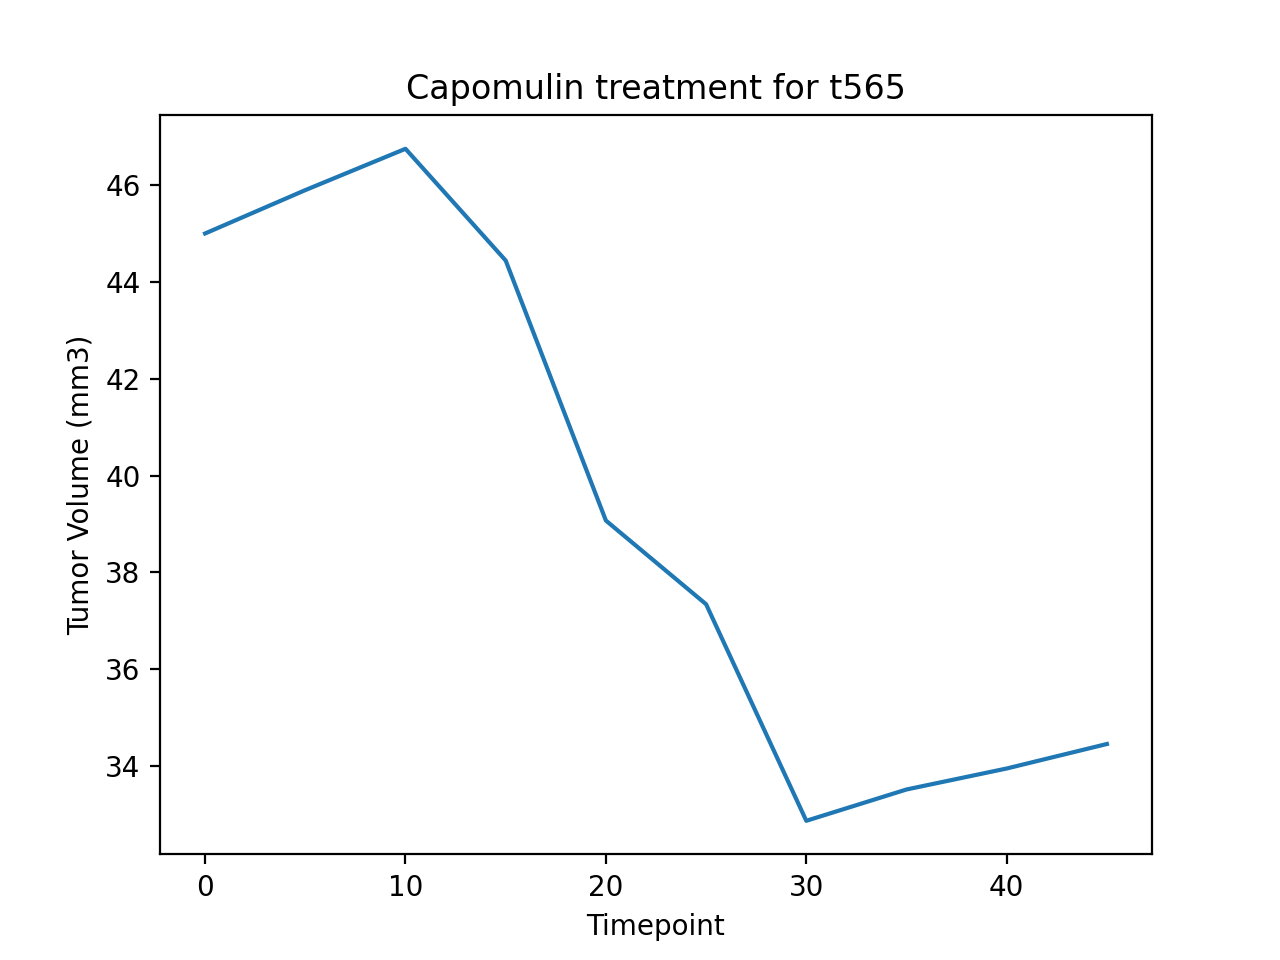

In [45]:
mouse_id = 't565'
mouse_t565 = clean_df.loc[clean_df['Mouse ID']== mouse_id]
plt.plot(mouse_t565['Timepoint'], mouse_t565['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f"Capomulin treatment for t565")
plt.show()

In [46]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_ave = capomulin_df.groupby('Mouse ID').mean()
capomulin_ave

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


<IPython.core.display.Javascript object>


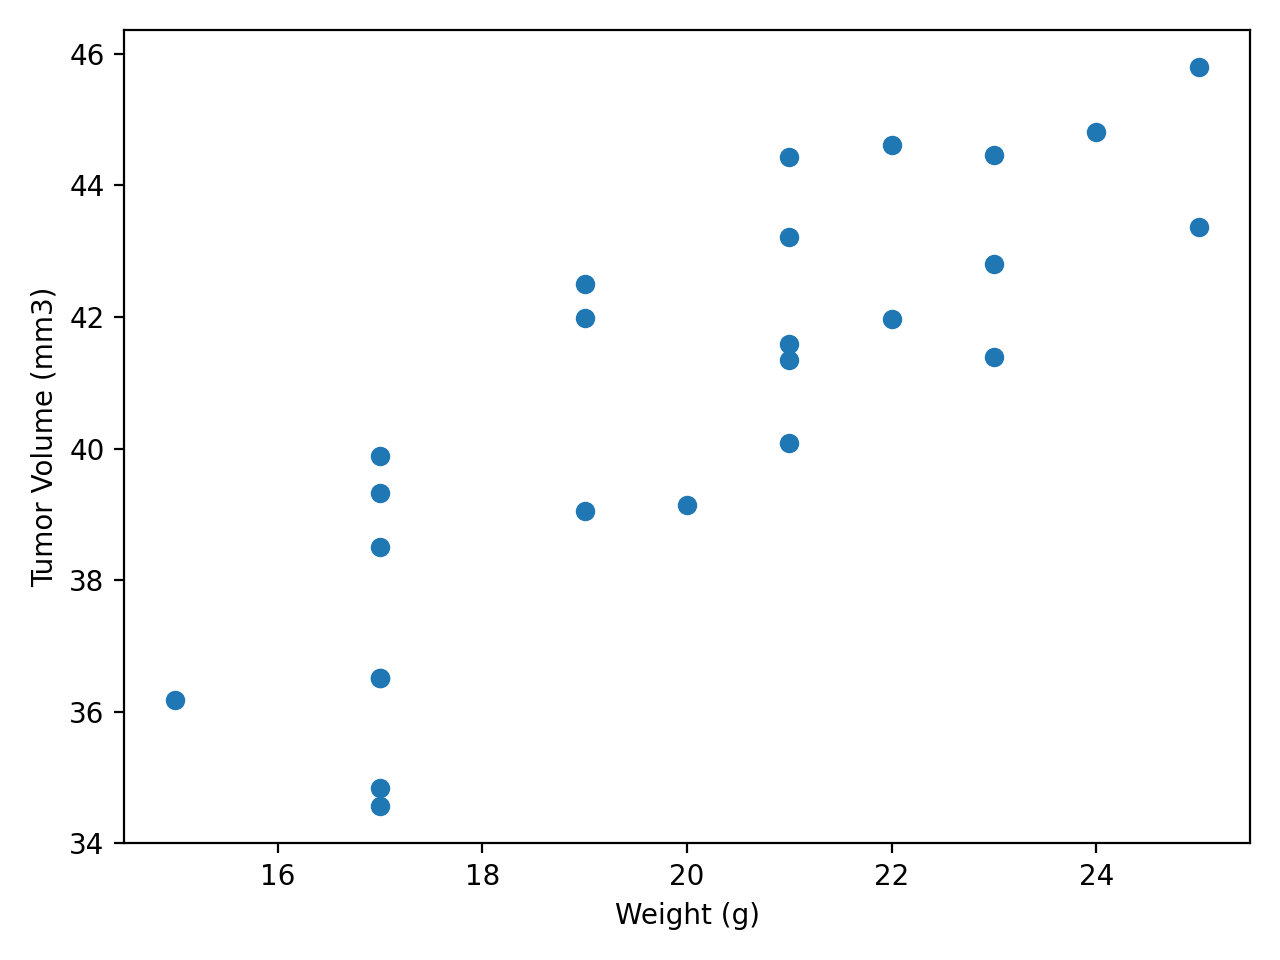

In [48]:
plt.scatter(capomulin_ave['Weight (g)'], capomulin_ave['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
plt.tight_layout()

## Correlation and Regression

In [49]:
capomulin_ave.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


In [50]:
# Calculate the correlation coefficient and linear regression model 

st.pearsonr(capomulin_ave['Weight (g)'], capomulin_ave['Tumor Volume (mm3)'])


(0.8419363424694717, 1.322572243471279e-07)

<IPython.core.display.Javascript object>


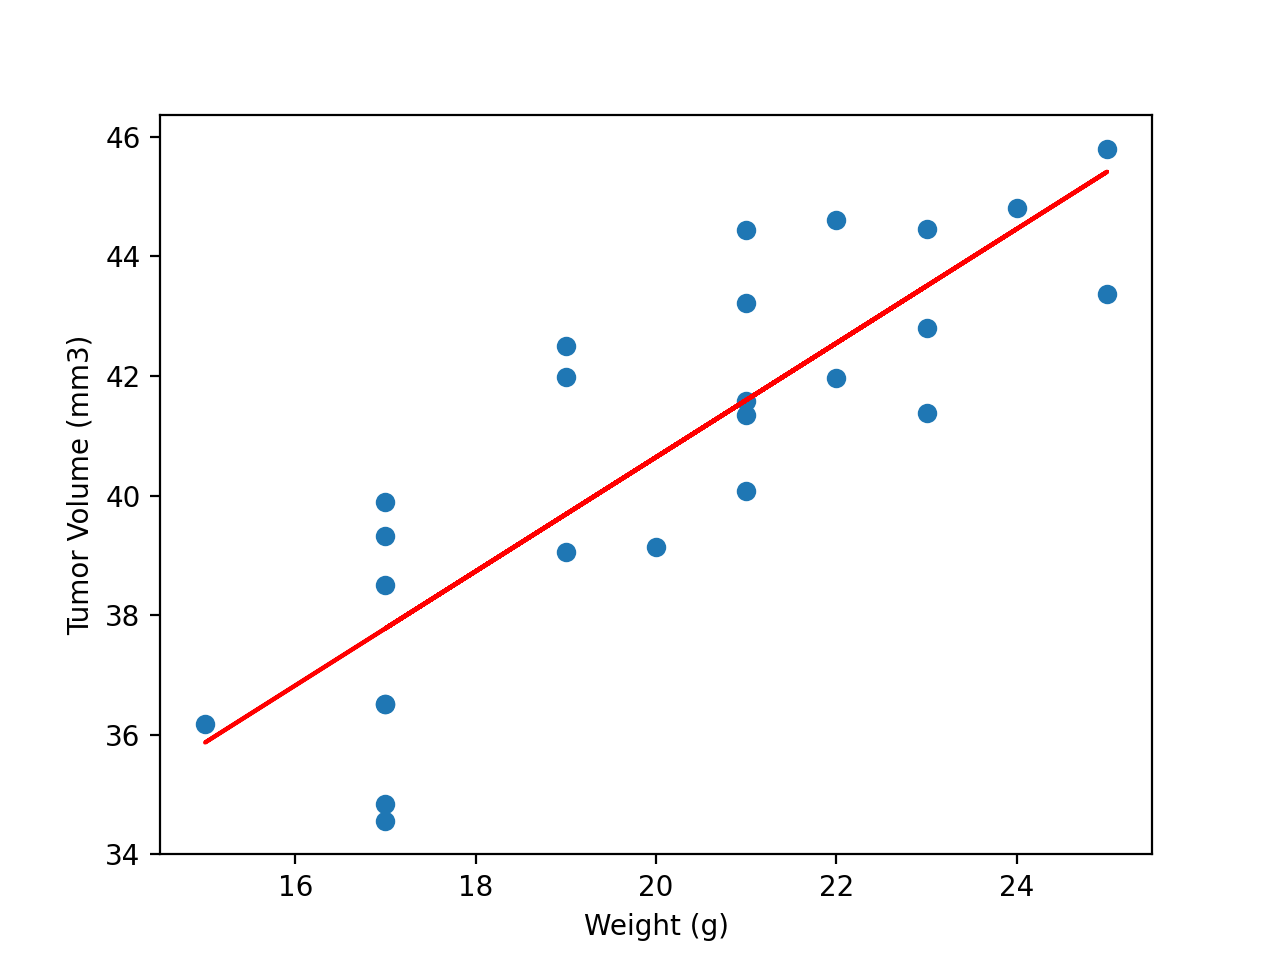

In [51]:
 # for mouse weight and average tumor volume for the Capomulin regimen
ps_corr = round(st.pearsonr(capomulin_ave['Weight (g)'], capomulin_ave['Tumor Volume (mm3)'])[0],2)

slope, intercept, rvalue, pvalue, stderr = st.linregress(capomulin_ave['Weight (g)'], capomulin_ave['Tumor Volume (mm3)'])

regression = slope * capomulin_ave["Weight (g)"] + intercept

plt.scatter(capomulin_ave['Weight (g)'], capomulin_ave['Tumor Volume (mm3)'])
plt.plot(capomulin_ave["Weight (g)"], regression, 'r-')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

#line_eq = “y = ” + str(round(slope,2)) + “x +” + str(round(intercept,2))